# Принятие решений в бизнесе на основе данных

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Часть 1. Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задача
    Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot as plt

hyp = pd.read_csv('/datasets/hypothesis.csv')
hyp.columns = hyp.columns.str.lower()

In [25]:
# приоритизация гипотез ICE
hyp['ice'] = round((hyp.impact * hyp.confidence) / hyp.efforts,2)

# приоритизация гипотез RICE

hyp['rice'] = (hyp.reach * hyp.impact * hyp.confidence) / hyp.efforts

hyp['number_of_hyp'] = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
hyp.sort_values('ice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice,number_of_hyp
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2,8
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0,0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0,7
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0,6
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0,2
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0,5
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0,3
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0,4


Top-3 гипотез по ICE
                                           hypothesis    ice
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20

Top-3 гипотез по RICE
                                           hypothesis   rice
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0


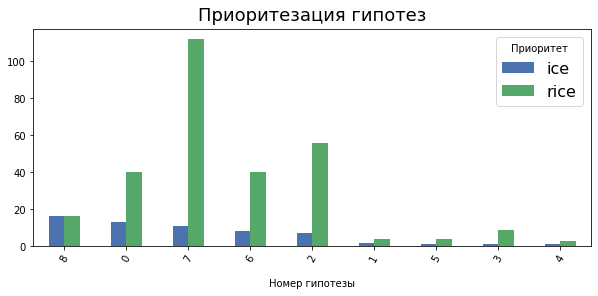

In [26]:
print('Top-3 гипотез по ICE\n',hyp[['hypothesis','ice']].sort_values('ice', ascending = False).head(3))
print()
print('Top-3 гипотез по RICE\n',hyp[['hypothesis','rice']].sort_values('rice', ascending = False).head(3))

plt.style.use('seaborn-deep')
hyp.set_index('number_of_hyp')[['ice', 'rice']].sort_values('ice', ascending = False).plot(kind='bar', figsize=(10, 4))
plt.xticks(rotation=60)
plt.title("Приоритезация гипотез", fontsize=18, y=1.01)
plt.xlabel("Номер гипотезы", labelpad=15)
plt.legend(["ice",'rice'], fontsize=16, title="Приоритет")

При применении метода RICE приоритезация изменилась: на первом месте гипотеза номер 7 (так как её уровень охрата максимальный среди остальных). То есть чем больше пользователей гипотеза затронет, тем выше её приоритет. Поэтому и запуск акции для скидки на товар в день рождения, а также кампания по пополнению базы клиентов (в том числе для email-рассылок) и расширения трафика являются самыми персективными для анализа.



## Часть 2. Приоритизация гипотез

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### Задача

Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. 

Варианты решений: 
 1. Остановить тест, зафиксировать победу одной из групп. 
 2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

In [27]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

orders.columns = ['order_id','user_id','date','revenue','group']
visitors.columns = ['date','group','user_id']

orders.date = pd.to_datetime(orders.date, format='%Y.%m.%d')
visitors.date = pd.to_datetime(visitors.date, format='%Y.%m.%d')

Чтобы исключить проблему подсматривания, анализируют графики метрик.
Изучают графики кумулятивных, или накапливаемых данных.

In [28]:
#  datesGroups с уникальными парами значений 'date' и 'group'
datesGroups = orders[['date','group']].drop_duplicates()

# суммарная выручка заказов в группе теста по указанную дату включительно
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'order_id' : pd.Series.nunique, 'user_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# количество уникальных посетителей в группе теста по указанную дату включительно
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'user_id' : 'sum'}), axis=1)\
                                       .sort_values(by=['date','group'])

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Text(0.5, 1.0, 'График кумулятивной выручки по группам')

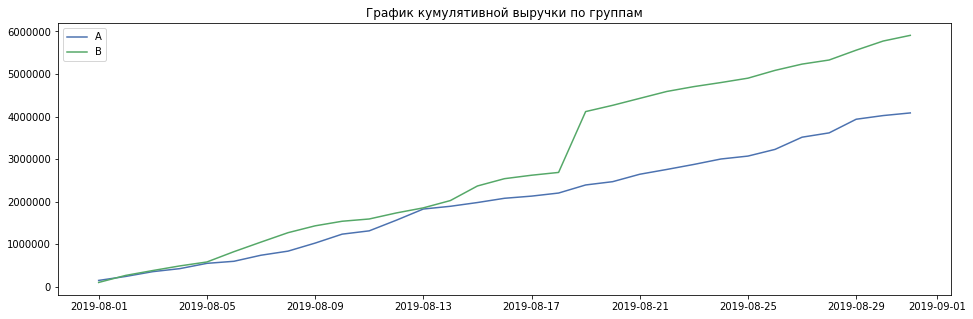

In [29]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

plt.rcParams["figure.figsize"] = (16,5)
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам')

С 13 августа сегмент B вырвался вперед и оставался на лидирующей позиции весть тест. Думаю, из-за аномально больших заказов. Уже к 19 августа за один день резко увеличилась выручка (с 2.3 до 4.1 млн).



Text(0.5, 1.0, 'График кумулятивного среднего чека по группам')

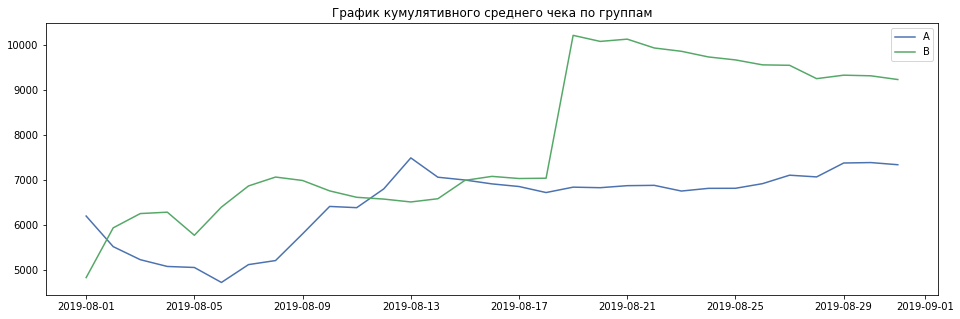

In [30]:
plt.rcParams["figure.figsize"] = (16,5)
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Видно, что 18 августа резко увеличился показатель для группы B.

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

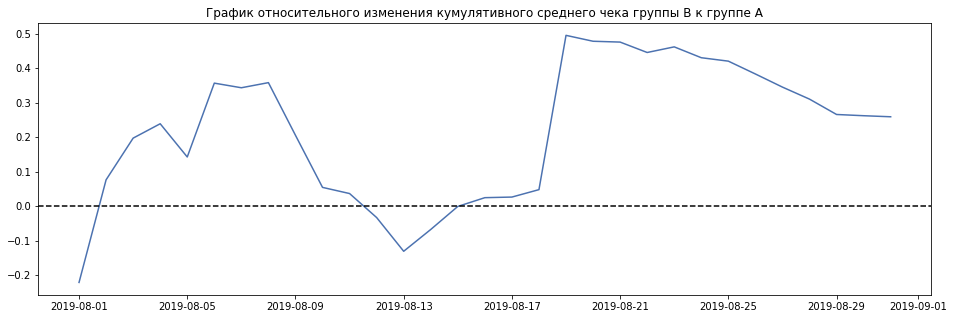

In [31]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, 
                                                     left_on='date', 
                                                     right_on='date', 
                                                     how='left', 
                                                     suffixes=['A', 'B'])

plt.plot(mergedCummulativeRevenue['date'], 
         (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

Результаты теста менялись с течением времени из-за аномальных заказов. На всех трех графиках видно, что 18 августа произошла крупная покупка в группе B.



Text(0.5, 1.0, 'График кумулятивной конверсии по группам')

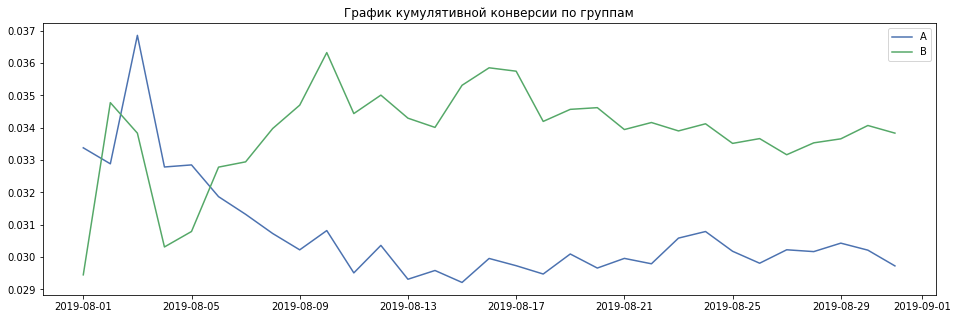

In [32]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')

В начале теста сегмент A имел большую конверсию, но постепенно сегмент B стал зеркально больше значения сегмента A.

Text(0.5, 1.0, 'График относительного изменения кумулятивной конверсии группы B к группе A')

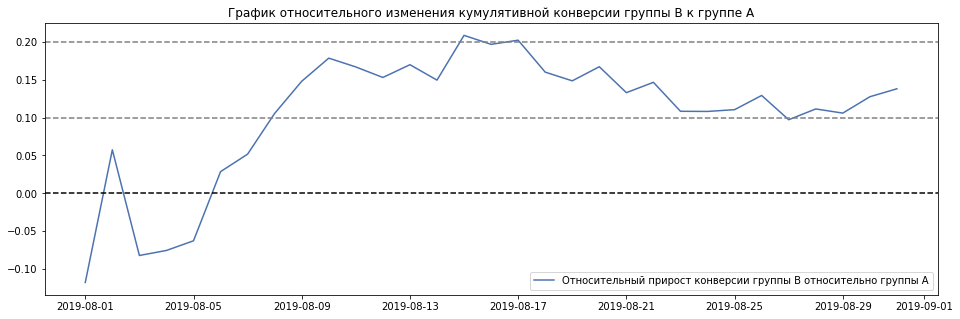

In [33]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], 
                                                                             left_on='date', 
                                                                             right_on='date', 
                                                                             how='left', 
                                                                             suffixes=['A', 'B'])

plt.plot(mergedCummulativeConversions['date'], 
         mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')

С 6 августа группа B лидирует по конверсии: становится лучше и лучше, максимальный прирост в 20% относительно группы A достигается с 15 по 18 августа. Далее опускается и фиксируется примерно на 10%.

Text(0.5, 1.0, 'График количества заказов по пользователям')

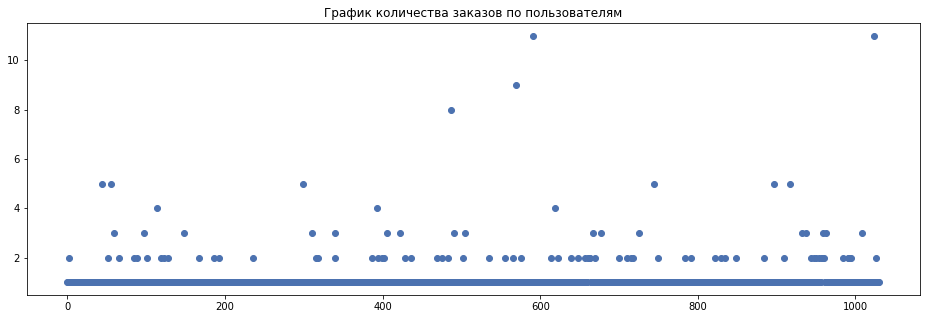

In [34]:
# посмотрим число заказов по пользователям
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                       .groupby('user_id', as_index=False)
                       .agg({'order_id' : pd.Series.nunique}))

ordersByUsers.columns = ['user_id','orders']
ordersByUsers.sort_values(by='orders',ascending=False)

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')

Большинство пользователей делали один заказ, реже - 2. Много ли два заказа или мало, не понятно. Надо смотреть перцентели.

In [35]:
print('95 и 99 перцентили по заказам равны', np.percentile(ordersByUsers.orders, [95, 99]))

95 и 99 перцентили по заказам равны [2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырех заказов. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

Text(0.5, 1.0, 'График стоимостей заказов')

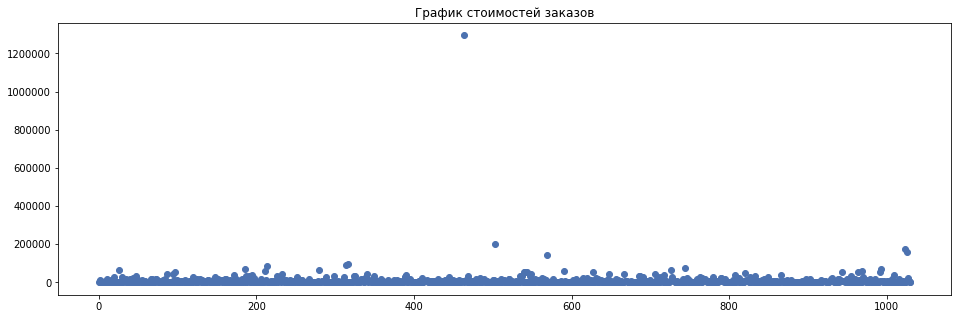

In [36]:
revenueByUsers = orders.drop(['group', 'order_id', 'date'], axis=1).groupby('user_id', as_index=False).agg({'revenue': pd.Series.sum})

revenueByUsers.columns = ['user_id','revenue']
revenueByUsers.sort_values(by='revenue',ascending=False)

x_values = pd.Series(range(0,len(revenueByUsers['revenue'])))
plt.scatter(x_values, revenueByUsers['revenue'])
plt.title('График стоимостей заказов')

In [37]:
# смотрим, кто делал аномальные по стоимости заказы
revenueByUsers.query('revenue > 160000') 
list_= ['1920142716', '2108080724', '4256040402']
orders.query('user_id in @list_').sort_values('group')

,order_id,user_id,date,revenue,group
114,1120327437,4256040402,2019-08-01,5800,A
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
588,3700356838,4256040402,2019-08-20,17650,A
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1091,750632879,4256040402,2019-08-12,50,A
60,1421016313,4256040402,2019-08-16,56650,B
263,2575861846,4256040402,2019-08-18,10970,B
425,590470918,1920142716,2019-08-19,1294500,B


Заказов выше 100 тыс. не очень много. Есть выбросы в районе от 160 до 200 и более 1200. Такие заказы выглядят аномально. 

Пользователь 1920142716 19 августа сделал заказ (попал в группу B) на сумму 1294500 д.е. (в один день) - стоит от него избавиться.


In [38]:
orders = orders.query('revenue != 1294500')

In [39]:
print('95 и 99 перцентили по заказам равны', np.percentile(revenueByUsers.revenue, [95, 99]))

95 и 99 перцентили по заказам равны [32899.5 67750. ]


Не более, чем у 5% заказов чек дороже 33 тыс. рублей. И не больше, чем у 1% заказов — дороже 68 тыс. рублей. Далее лучше работать с выручкой менее 33 тыс.руб.



In [40]:
#  количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group']=='A'][['date', 'user_id']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'user_id']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [41]:
# количество заказов и суммарная выручка в выбранную дату в группе A
ordersADaily = orders[orders['group']=='A'][['date', 'order_id', 'user_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'order_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# суммарное число заказов и суммарная выручка до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# количество заказов и суммарная выручка в выбранную дату в группе B
ordersBDaily = orders[orders['group']=='B'][['date', 'order_id', 'user_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'order_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# суммарное число заказов и суммарная выручка до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Используем непараметрический тест Манна-Утни, так как невозможно работать с самими значениями заказов из-за выбрасов (аномальных заказов) - надо работать с их рангами.


In [47]:
# для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = orders[orders['group']=='A'].groupby('user_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('user_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders'] 

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

ordersByUsersA = orders[orders['group']=='A'].groupby('user_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('user_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

# количество заказов пользователей двух групп
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# применим критерий и отформатируем p-value
print('P-value равно', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1
print('Относительный прирост конверсии группы B к конверсии группы A равен',
      "{0:.1%}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value равно 0.00910
Относительный прирост конверсии группы B к конверсии группы A равен 13.6%


P-value меньше 0.05, потому нулевую гипотезу отвергаем. 
Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. 
Относительный прирост конверсии группы B к конверсии группы A равен 13.6%.
Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

In [43]:
print('P-value равно',
      "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека между сегментами равно', 
      "{0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value равно 0.382
Относительное различие среднего чека между сегментами равно -1.56%


Статистически значимых отличий в среднем чеке между группами нет.

Примем за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 33 тыс. рублей. Так удалим 5% пользователей с наибольшим числом заказов и от 1% заказов с наибольшей стоимостью.
Для этого сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных.

In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id']], 
                                 axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 33000]['user_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

Выявили множество аномальных пользователей. После их удаления будет пора считать статистическую значимость. Надо выяснить, есть ли существенные различия между группами с очищенными данными.

In [45]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)

print('P-value равно',"{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B к конверсии группы A равен',
      "{0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value равно 0.00582
Относительный прирост конверсии группы B к конверсии группы A равен 17.6%


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

In [46]:
print('P-value равно',"{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительное различие среднего чека между сегментами равно',"{0:.2%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value равно 0.407
Относительное различие среднего чека между сегментами равно 0.08%


### Итог

1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
2. Статистическая значимость различия среднего чека заказов между группами отсутствует даже после удаления выбросов.
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
4. График различия среднего чека колеблется: на нем видны аномалии.

Что дальше? Остановить тест, зафиксировать победу одной из групп хотя бы одной метрике (B).